# Data description


In [1]:
# Packages are imported
import pandas as pd
import numpy as np 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from scipy.stats import pearsonr

In [2]:
# A DataFrame is created from the salary data
salary_df = pd.read_csv('salary.csv')
salary_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
salary_df.isnull().values.any()

True

In [4]:
# Checking null values
salary_df[salary_df['salary'].isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [5]:
salary_df['yearsrank'].median()

5.0

In [6]:
#Dropping row with null value
salary_df_new = salary_df.dropna(axis=0, inplace=True)

In [7]:
salary_df.isnull().values.any()

False

# Exploratory Data Analysis

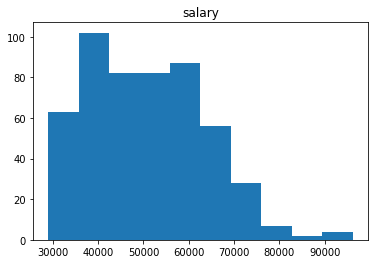

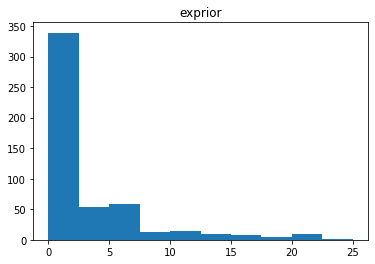

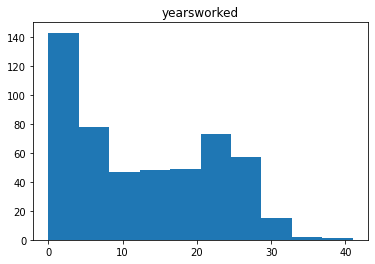

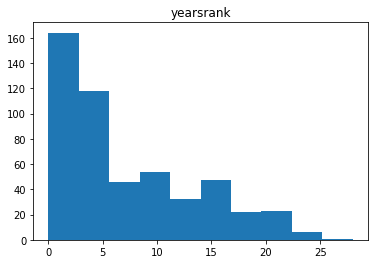

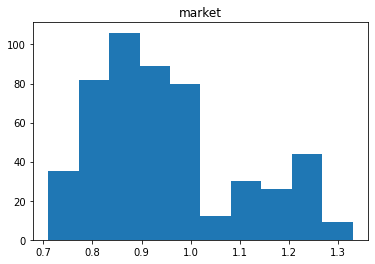

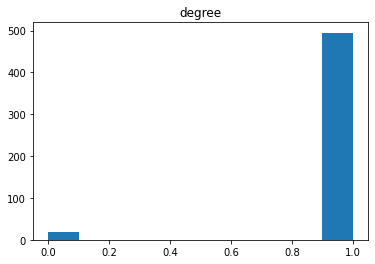

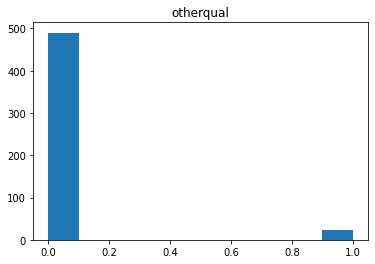

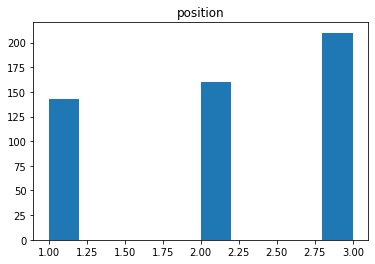

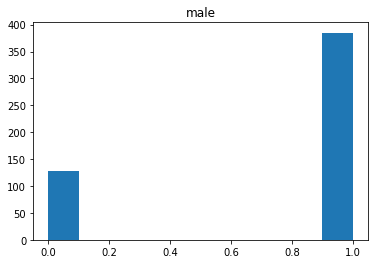

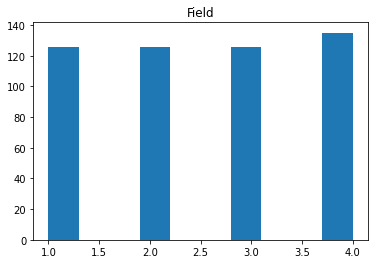

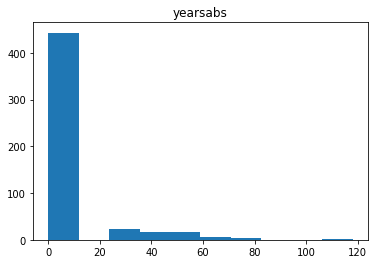

In [8]:
for i in list(salary_df.columns):
    plt.hist(salary_df[i])
    plt.title(i)
    plt.show()
    
    

-Most of the people in the sample set have a market value below the median. This also means that most of the people earn a salary below the market value.

-People in the sample set earn low salaries and people in the sample set do not have much experience prior to their current careers.

-Men are the most participants and are in executive positions.

-According to the graphs almost everyone has been absent from work 10 years or less and few people have surpassed that amount of time.



In [9]:
# A correlation matrix is drawn
salary_df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


- I can conclude that yearsworked, yearsrank and position are columns I could use to model and that just happened after examining the correlation between all the columns.Therefore, since the position column contains categorical data I cannot use it to build a model.

# Visualizations are Checked for distributions,patterns and outliers


Text(0, 0.5, 'salary')

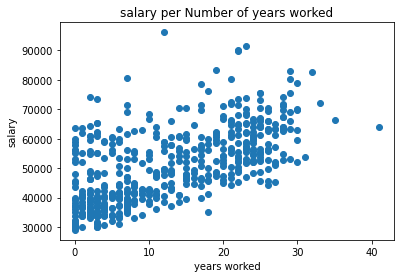

In [10]:
#plot graph to understand relationship between years worked and salary
plt.scatter(salary_df['yearsworked'],salary_df['salary'])
plt.title('salary per Number of years worked')
plt.xlabel('years worked')
plt.ylabel('salary')

In [11]:
pearsonr(salary_df['yearsworked'],salary_df['salary'])

(0.6235888657598051, 1.287335134291421e-56)

Unstandardized coefficients are usually intuitive to interpret and understand. Since they represent the relation between raw data, they can be used directly in calculations and analysis. They can also be used to make comparisons within the regression equation when just one measurement scale is in use, so the p-value is low meaning that the correlation is statistically significant and the data is appropriate linear regressiob


# Spliting model into training and testing set

In [12]:
x1 = salary_df[['yearsworked']]

In [13]:
x = sm.add_constant(x1.values)

In [14]:
y = salary_df['salary']

In [15]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [16]:
#check null values in training set
y_train.isnull().values.any()

False

# Predictions and Evaluation / Modelling with constant


In [17]:
model = sm.OLS(y_train, x_train).fit()

In [18]:
predictions = model.predict(x_test)

Text(0, 0.5, 'Y-Predicted')

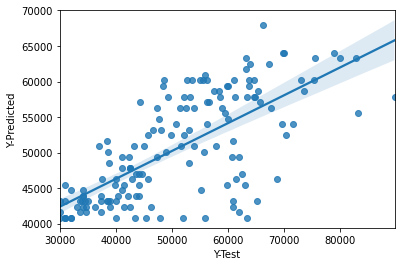

In [19]:
sns.regplot(y_test, predictions)
plt.xlabel('Y-Test')
plt.ylabel('Y-Predicted')

In [20]:
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     187.5
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           1.35e-34
Time:                        16:06:25   Log-Likelihood:                -3817.5
No. Observations:                 359   AIC:                             7639.
Df Residuals:                     357   BIC:                             7647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.082e+04    905.027     45.104      0.000     3.9e+04    4.26e+04
x1           774.7688     56.582     13.693      0.000     663.493     886.044
==============================================================================
Omnibus:                       63.183   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.136
Skew:                           1.076   Prob(JB):                     4.90e-22
Kurtosis:                       4.390   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

95% confidence intervals [0.025, 0.975] are [663.493 - 886.044] and this is the range in which our coffecient is likely to fall.
An increase in sample size will decrease the length of the confidence interval without reducing the level of confidence. This is because the standard deviation decreases as n increases. The margin of error m of a confidence interval is defined to be the value added or subtracted from the sample mean which determines the length of the interval.
All other features fixed, a 1 unit increase in yearsworked is associated with an increase of 774.769

In [21]:
model.predict(pd.DataFrame({'conts':1.0, 'years':[12,80]}))

0     50117.213957
1    102801.492334
dtype: float64

In [22]:
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(x_train))))

TEST RMSE: 9639.131250830247
TRAIN RMSE: 10045.176101008155


# Modelling without constant

In [23]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=101)

In [24]:
model = sm.OLS(y_train, x1_train).fit()

In [25]:
predictions = model.predict(x1_test)

Text(0, 0.5, 'Y-Predicted')

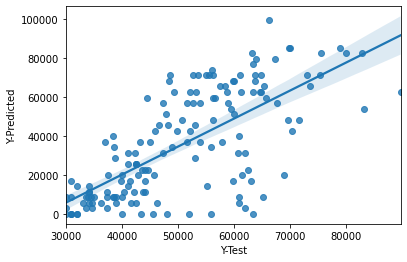

In [26]:
sns.regplot(y_test, predictions)
plt.xlabel('Y-Test')
plt.ylabel('Y-Predicted')

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              1093.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):                   7.81e-111
Time:                        16:06:27   Log-Likelihood:                         -4158.9
No. Observations:                 359   AIC:                                      8320.
Df Residuals:                     358   BIC:                                      8324.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2840.0566     85.905     33.061      0.000    2671.115    3008.998
==============================================================================
Omnibus:                        5.971   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                3.760
Skew:                          -0.029   Prob(JB):                        0.153
Kurtosis:                       2.502   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.predict([12, 80])

array([ 34080.67884927, 227204.5256618 ])

By comparing someone with 12 and 80 years experience the is a huge difference between them.That makes sense in terms of the model because as years increase there is a tendency for the salary to increase as well.
Has you see someone with 80 years experience will earn 227204.5256618 and the other with 12 

In [30]:
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(x1_train))))

TEST RMSE: 25156.779555611032
TRAIN RMSE: 25998.23792521561


# Therefore, the model with the constant is better at predicting values as it has a RSME that is significantly smaller than when the one without a constant.